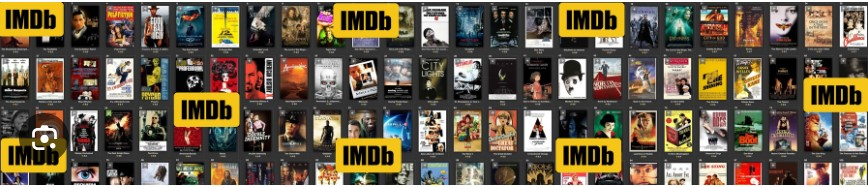

Problem Statement:


The Internet Movie Database, or IMDb for short, is a database that contains details about movies, TV shows, home videos, video games, and streaming content. It also includes personal biographies of the cast, crew, and other relevant personnel, narrative summaries, trivia, ratings, and reviews from both fans and critics. Message boards, an extra fan feature, were dropped in February 2017. The database was once run by fans, but it is currently owned and run by IMDb.com, Inc., an Amazon subsidiary. 
The current Project aim to automatically collect reviews—positive or negative—from the IMDB for a film. This will then be utilized to get a concensus of of the film as well as to assist other customers in deciding whether or not to see it.cts

### Importing Required Packages

In [7]:
##general Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
import scipy.stats as stats
import os

###NLP Packages
import nltk 
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
from nltk.tokenize import word_tokenize

##SKLearn related Packages
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import scale
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier

# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Arun\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [11]:
pwd()

'C:\\Users\\Arun\\Great_learning\\Text Analytics'

In [13]:
os.chdir('C:\\Users\\Arun\\OneDrive\\Desktop\\Python\\Fellowship_AI')

In [15]:
df=pd.read_csv("IMDB Dataset.csv")

In [17]:
#C:\Users\Arun\OneDrive\Desktop\Python\Fellowship_AI

In [19]:
#basic descriptive statistics
df.head(10)## there are special characters in the dataset <br ><br > and quotes which need to removed 

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [21]:
df.describe()## there are equal proportion of Positive and negative reviews in the dataset.

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [23]:
df.info()#Both dataset are object dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [25]:
df['sentiment'].value_counts()##balanced data set with equal distribution of Positive and negative sentiments.No need to do SMOTE analysis

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [27]:
df.shape# there are 5000 rows and 2 columns

(50000, 2)

In [29]:
(df['review'].isnull().sum() * 100 / df['review'].index.size).round(2)# all rows within the review column are populated
(df['sentiment'].isnull().sum() * 100 / df['sentiment'].index.size).round(2)# all rows within the sentiment column are populated

0.0

0.0


NLP is critical for enabling effective communication between humans and machines, allowing for the automation of tasks that involve language. By leveraging machine learning and deep learning techniques, NLP systems can improve their understanding and processing of language over time, making them increasingly effective in real-world applications.
Following are the basic steps in NLP

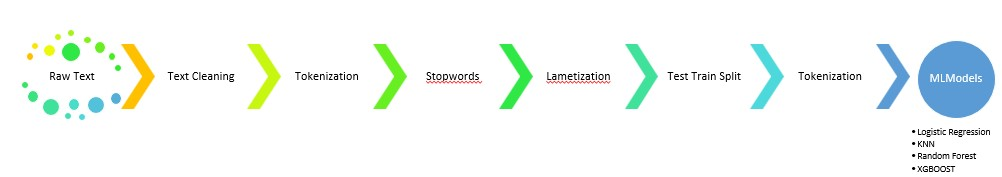



POS tagging helps in disambiguating words with multiple meanings and reveals the grammatical structure of sentences.In context to this IMMDB Project, POS tagging is not required For tasks like basic text cleaning (removing punctuation, converting text to lowercase, removing stopwords), POS tagging is often unnecessary.

### Cleaning Dataset

In [34]:
df['cleaned_review'] = df['review'].replace({'<br ><br>': '',' <br ><br >':'','<br ><br >': '',"'": '','<br ><br >':'','<br /><br />' : '','"':''}, regex=True)
df['cleaned_review'] = df['cleaned_review'].replace(r'[()]', '', regex=True)
print(df['cleaned_review'].head())

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. The filming tec...
2    I thought this was a wonderful way to spend ti...
3    Basically theres a family where a little boy J...
4    Petter Matteis Love in the Time of Money is a ...
Name: cleaned_review, dtype: object


### Tokenizing-Dataset

Tokenizing a dataset in Natural Language Processing (NLP) involves breaking down text into smaller units called tokens, which can be words, phrases, or characters. 

In [18]:
# List of stop words
stop_words = set(stopwords.words('english'))

list=["can't",'cannot', 'can not', "don't"]
updated_stop_words=[word for word in stop_words if word.lower() not in list]
# Function to remove stop words from a sentence
def remove_stop_words(sentence):
    words = word_tokenize(sentence)
    filtered_sentence = [word for word in words if word.lower() not in updated_stop_words
                       
    return ' '.join(filtered_sentence)

# Apply the function to the DataFrame
df['tokenized_review'] = df['cleaned_review'].apply(remove_stop_words)

In [19]:
df['tokenized_review'].head()

0    One reviewers mentioned watching 1 Oz episode ...
1    wonderful little production . filming techniqu...
2    thought wonderful way spend time hot summer we...
3    Basically theres family little boy Jake thinks...
4    Petter Matteis `` Love Time Money '' visually ...
Name: tokenized_review, dtype: object

### lemmatizing DataSet

Reducing words to their lemma, or basic or root form, is a critical step in the Natural Language Processing (NLP) process called lemmatization. Because it guarantees that a word's various forms are handled as the same item, this procedure is especially helpful for enhancing the performance of NLP models.

In [22]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()
# Function to lemmatize a sentence
def lemmatize_sentence(sentence):
    tokens = word_tokenize(sentence)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Apply the lemmatization function to the Pandas Series
df['lemmatized_text'] = df['tokenized_review'].apply(lemmatize_sentence)


In [23]:
df['lemmatized_text'].head()

0    One reviewer mentioned watching 1 Oz episode y...
1    wonderful little production . filming techniqu...
2    thought wonderful way spend time hot summer we...
3    Basically there family little boy Jake think t...
4    Petter Matteis `` Love Time Money `` visually ...
Name: lemmatized_text, dtype: object

In [24]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
df_final=df[['sentiment','lemmatized_text']].copy(deep=True)

In [26]:
df_final.shape

(50000, 2)

In [27]:
# Split the whole dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_final['lemmatized_text'], df_final['sentiment'], test_size=0.2, random_state=100)

In [28]:
X_train.shape,X_train.shape, X_test.shape, y_train.shape, y_test.shape
y_train.value_counts()
y_train.unique()

((40000,), (40000,), (10000,), (40000,), (10000,))

sentiment
negative    20082
positive    19918
Name: count, dtype: int64

array(['positive', 'negative'], dtype=object)

In [29]:
y_train=y_train.replace('negative',0)
y_train=y_train.replace('positive',1)
y_test=y_test.replace('negative',0)
y_test=y_test.replace('positive',1)

C:\Users\Arun\AppData\Local\Temp\ipykernel_39084\980060407.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train=y_train.replace('positive',1)
C:\Users\Arun\AppData\Local\Temp\ipykernel_39084\980060407.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test=y_test.replace('positive',1)


In [30]:
y_train.unique()
y_train.value_counts()
y_test.unique()
y_test.value_counts()

array([1, 0], dtype=int64)

sentiment
0    20082
1    19918
Name: count, dtype: int64

array([0, 1], dtype=int64)

sentiment
1    5082
0    4918
Name: count, dtype: int64

## Vectorization

In [32]:
vectorizer = TfidfVectorizer()
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1500)  # Adjust max_features based on your needs

# Fit the tfidf vectorizer for the training data
vectorizer.fit(df['lemmatized_text'])

#Apply the trained vectorizer to the train and test data
train_inputs = vectorizer.transform(X_train)
test_inputs = vectorizer.transform(X_test)


TfidfVectorizer(max_features=1500)

In [33]:
train_inputs.toarray() # input is till sparse, the number represents the TFIDF for each term

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
type(train_inputs)

scipy.sparse._csr.csr_matrix

In [35]:
tfidf_array = train_inputs[1:5].toarray()

In [36]:
tfidf_array[0:3][0][0]

0.0

In [37]:
y_train.value_counts()

sentiment
0    20082
1    19918
Name: count, dtype: int64

## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=200)
#'newton-cg', 'lbfgs', 
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(train_inputs, y_train)

# Get the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_log_reg = grid_search.best_estimator_

# Make predictions on the test set
best_log_reg.fit(train_inputs,y_train)



GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}


LogisticRegression(C=1, max_iter=200, solver='saga')

In [109]:
Log_accuracy_score = accuracy_score(ytest_predict_log, y_test) # get the accuracy score
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, ytest_predict_log))
print(Log_accuracy_score)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4918
           1       0.88      0.89      0.88      5082

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

0.8796


In [196]:
LOG_Regression=classification_report(y_test, ytest_predict_log)

In [261]:
print("Log_accuracy_score:", round(Log_accuracy_score*100,2),'%')
LOG_f1_score= f1_score(ytest_predict_log, y_test) 
print("Logistic_F1_score:", round(LOG_f1_score*100,2),'%')
LOG_precision_score= precision_score(ytest_predict_log, y_test)
print("Logisitic_precision_score:", round(LOG_precision_score*100,2),'%')
LOG_recall_score= recall_score(ytest_predict_log, y_test)
print("Logisitic_recall_score:" ,round(LOG_recall_score*100,2),'%')

Log_accuracy_score: 87.96 %
Logistic_F1_score: 88.25 %
Logisitic_precision_score: 89.0 %
Logisitic_recall_score: 87.52 %


## XGB

In [42]:
!pip install xgboost

In [43]:
from xgboost import XGBClassifier
param_grid = {'eta': [0.01, 1, 0.05]} # build the parameter grid
xgb_clf = XGBClassifier() #initialize the model
xgb_grid_search = GridSearchCV(xgb_clf, param_grid=param_grid, cv=5) # Initialize the GridSearchCV
xgb_grid_search.fit(train_inputs[0:2000], y_train[0:2000]) # Train the GridSearchCV on sample data

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'eta': [0.01, 1, 0.05]})

In [44]:
xgb_model = xgb_grid_search.best_estimator_ # get the model with best hyperparameters
xgb_model.fit(train_inputs, y_train) # train the model on train data
xgb_ypreds = xgb_model.predict(test_inputs) # predict the model on test data
xgb_accuracy_score = accuracy_score(xgb_ypreds, y_test) # get the accuracy score
print(f"Accuracy of XGB Classifier is {xgb_accuracy_score}")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.05, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Accuracy of XGB Classifier is 0.8075


In [45]:
# print precision, accuracy, recall and f1-score for XGB classifer
print(classification_report(xgb_ypreds, y_test))
classification_report(xgb_ypreds, y_test)

              precision    recall  f1-score   support

           0       0.75      0.84      0.79      4361
           1       0.87      0.78      0.82      5639

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



In [265]:
print("XGB_accuracy_score:", round(xgb_accuracy_score*100,2),'%')
XGB_f1_score= f1_score(ytest_predict_log, y_test) 
print("XGB_F1_score:", round(XGB_f1_score*100,2),'%')
XGB_precision_score= precision_score(ytest_predict_log, y_test)
print("XGB_precision_score:", round(XGB_precision_score*100,2),'%')
XGB_recall_score= recall_score(ytest_predict_log, y_test)
print("XGB_recall_score:" ,round(XGB_recall_score*100,2),'%')

XGB_accuracy_score: 87.96 %
XGB_F1_score: 88.25 %
XGB_precision_score: 89.0 %
XGB_recall_score: 87.52 %


### KNN

In [52]:
# Initialize the KNN model
knn = KNeighborsClassifier()

# Define the grid of hyperparameters to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
# Fit the grid search to the data
grid_search.fit(train_inputs, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [63]:
knn_model = grid_search.best_estimator_ # get the model with best hyperparameters
knn_model.fit(train_inputs, y_train) # train the model on train data
knn_ypreds = knn_model.predict(test_inputs) # predict the model on test data
knn_accuracy_score = accuracy_score(y_test,knn_ypreds) # get the accuracy score
print(f"Accuracy of knn Classifier is {knn_accuracy_score}")

KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance')

Accuracy of knn Classifier is 0.7615


In [65]:
# print precision, accuracy, recall and f1-score for XGB classifer
print(classification_report(knn_ypreds, y_test))


              precision    recall  f1-score   support

           0       0.70      0.79      0.74      4319
           1       0.82      0.74      0.78      5681

    accuracy                           0.76     10000
   macro avg       0.76      0.77      0.76     10000
weighted avg       0.77      0.76      0.76     10000



In [190]:
print(classification_report(knn_ypreds, y_test))

KNN_classisfication=classification_report(knn_ypreds, y_test)

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      4319
           1       0.82      0.74      0.78      5681

    accuracy                           0.76     10000
   macro avg       0.76      0.77      0.76     10000
weighted avg       0.77      0.76      0.76     10000



In [273]:
print("KNN_accuracy_score:", round(knn_accuracy_score*100,2),'%')
KNN_f1_score= f1_score(ytest_predict_log, y_test) 
print("KNN_F1_score:", round(KNN_f1_score*100,2),'%')
KNN_precision_score= precision_score(ytest_predict_log, y_test)
print("KNN_precision_score:", round(KNN_precision_score*100,2),'%')
KNN_recall_score= recall_score(ytest_predict_log, y_test)
print("KNN_recall_score:" ,round(KNN_recall_score*100,2),'%')

KNN_accuracy_score: 76.15 %
KNN_F1_score: 88.25 %
KNN_precision_score: 89.0 %
KNN_recall_score: 87.52 %


## Random Forest

In [91]:
# Train and predict RandomForest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'n_estimators': [100, 200, 500], # Build the parameter grid
              'max_depth': [None, 5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
rfc = RandomForestClassifier(random_state=0, verbose=True) # Initialize the model
rfc_grid_search = RandomizedSearchCV(rfc, param_distributions=param_grid, cv=5, n_iter=15) # Inititae the Randomised search CV
rfc_grid_search.fit(train_inputs[0:2000], y_train[:2000]) # Fit the Randomise search CV for sample data

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(random_state=0,
                                                    verbose=True),
                   n_iter=15,
                   param_distributions={'max_depth': [None, 5, 10, 15],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]})

In [93]:
rfc_best_model = rfc_grid_search.best_estimator_ # get the best model with best hyperparameter
rfc_best_model.fit(train_inputs, y_train) # train the model on train data
rfc_ypreds = rfc_best_model.predict(test_inputs) # predict the results
rfc_accuracy_score = accuracy_score(rfc_ypreds, y_test) # get the accuracy score
print(f"Accuracy of Randdom Forest Classifier is {rfc_accuracy_score}")

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  4.2min
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:  9.5min


RandomForestClassifier(min_samples_split=5, n_estimators=500, random_state=0,
                       verbose=True)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    2.0s


Accuracy of Randdom Forest Classifier is 0.8475


In [184]:
# print precision, accuracy, recall and f1-score for Randomforest classifer
print(classification_report(rfc_ypreds, y_test))
RFC_classisfication=classification_report(rfc_ypreds, y_test)

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      4919
           1       0.85      0.85      0.85      5081

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [379]:
print("rfc_accuracy_score:", round(rfc_accuracy_score*100,2),'%')
rfc_f1_score= f1_score(ytest_predict_log, y_test) 
print("rfc_F1_score:", round(rfc_f1_score*100,2),'%')
rfc_precision_score= precision_score(ytest_predict_log, y_test)
print("rfc_precision_score:", round(rfc_precision_score*100,2),'%')
rfc_recall_score= recall_score(ytest_predict_log, y_test)
print("rfc_recall_score:" ,round(rfc_recall_score*100,2),'%')



RFC={'rfc_accuracy_score':rfc_accuracy_score,'rfc_f1_score':rfc_f1_score, 'rfc_precision_score':rfc_precision_score,'rfc_recall_score':rfc_recall_score}
KNN={'KNN_accuracy_score':knn_accuracy_score,'KNN_f1_score':KNN_f1_score, 'KNN_precision_score':KNN_precision_score,'KNN_recall_score':KNN_recall_score}
XGB={'xgb_accuracy_score':xgb_accuracy_score,'xgb_f1_score':XGB_f1_score, 'XGB_precision_score':XGB_precision_score,'XGB_recall_score':XGB_recall_score}
LOG={'Log_accuracy_score':Log_accuracy_score,'Logistic_F1_score':LOG_f1_score, 'Logisitic_precision_score':LOG_precision_score,'Logisitic_recall_score':LOG_recall_score}

for key, value in RFC.items():
    print(f"Key: {key}, Value: {(round(value*100,2))}")
print()
for key, value in KNN.items():
    print(f"Key: {key}, Value: {(round(value*100,2))}")
print()
for key, value in XGB.items():
    print(f"Key: {key}, Value: {(round(value*100,2))}")
print()
for key, value in LOG.items():
    print(f"Key: {key}, Value: {(round(value*100,2))}")
    
    


rfc_accuracy_score: 84.75 %
rfc_F1_score: 88.25 %
rfc_precision_score: 89.0 %
rfc_recall_score: 87.52 %
Key: rfc_accuracy_score, Value: 84.75
Key: rfc_f1_score, Value: 88.25
Key: rfc_precision_score, Value: 89.0
Key: rfc_recall_score, Value: 87.52

Key: KNN_accuracy_score, Value: 76.15
Key: KNN_f1_score, Value: 88.25
Key: KNN_precision_score, Value: 89.0
Key: KNN_recall_score, Value: 87.52

Key: xgb_accuracy_score, Value: 87.96
Key: xgb_f1_score, Value: 88.25
Key: XGB_precision_score, Value: 89.0
Key: XGB_recall_score, Value: 87.52

Key: Log_accuracy_score, Value: 87.96
Key: Logistic_F1_score, Value: 88.25
Key: Logisitic_precision_score, Value: 89.0
Key: Logisitic_recall_score, Value: 87.52


In [ ]:
print("Log_accuracy_score:", round(Log_accuracy_score*100,2),'%')
LOG_f1_score= f1_score(ytest_predict_log, y_test) 
print("Logistic_F1_score:", round(LOG_f1_score*100,2),'%')
LOG_precision_score= precision_score(ytest_predict_log, y_test)
print("Logisitic_precision_score:", round(LOG_precision_score*100,2),'%')
LOG_recall_score= recall_score(ytest_predict_log, y_test)
print("Logisitic_recall_score:" ,round(LOG_recall_score*100,2),'%')

<BarContainer object of 4 artists>

([0, 1, 2, 3],
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'XGBOOST'),
  Text(2, 0, 'KNN'),
  Text(3, 0, 'RandomForest Classifier')])

Text(0.5, 1.0, 'Accuracy of the models')

Text(0, 0.5, 'Accuracy in %')

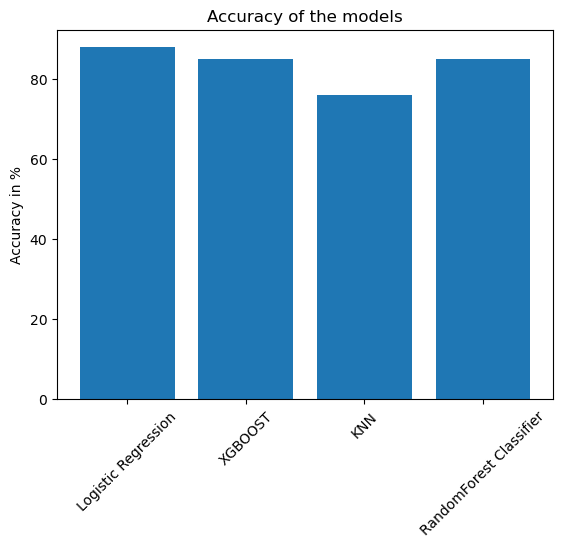

In [202]:
# Plot the accuracy of the models
models = ['Logistic Regression', 'XGBOOST', 'KNN', 'RandomForest Classifier']
accuracy = [88, 85, 76, 85]
plt.bar(models, accuracy)
plt.xticks(rotation=45);
plt.title('Accuracy of the models')
plt.ylabel('Accuracy in %')


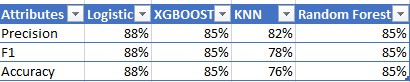

### Business Insights
1. Logistic Regression scores the highest accuracy with 89 % 
2. Clustering algorithm like KNN scores the least and has the lowest accuracy when it comes to capturing the sentiments of the movie goes
3. Computational XGBoost is very intensive and has produced model which comparitively close to baseline Logistic regression model
4. Both XBoost and RandomForest similar Model accuracy and the time consumed to train the model is significantly large compared to all the other model 

### Conclusion

By performing NlP of IMDB one can understand the significance of how the customers react to a particular movie. The perception towards movie can be used in order to group people or cluster individuals. This can in turn help the movie creators/ distributors make movies which tailor to the likes/dislikes the movie
Natural Language Processing (NLP) applied to IMDB data provides valuable insights into how customers react to a particular movie. Here’s an elaboration on how this works and its potential benefits for movie creators and distributors:

Understanding Customer Reactions through NLP

1. **Sentiment Analysis**:
   - **Extracting Opinions**: NLP techniques like sentiment analysis can be used to analyze customer reviews and comments. By determining whether the sentiments expressed are positive, negative, or neutral, one can gauge the overall reception of a movie.
   - **Emotion Detection**: Beyond basic sentiment, more advanced NLP can detect specific emotions such as joy, sadness, anger, or surprise. This helps in understanding the emotional impact a movie has on its audience.

2. **Topic Modeling**:
   - **Identifying Key Themes**: NLP can uncover common themes and topics mentioned in reviews. For instance, frequent mentions of "special effects," "acting," or "storyline" can highlight what aspects of the movie are most discussed.
   - **Spotting Trends**: By identifying recurring topics, it’s possible to spot trends in audience preferences and interests over time.

3. **Review Summarization**:
   - **Condensing Information**: NLP can be used to summarize lengthy reviews into concise summaries that capture the essence of what the audience is saying. This makes it easier to digest large volumes of feedback.

